In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dingyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
# 读取json
import json
with open('output/output.json',encoding="utf-8") as file:
    # 读取文件内容
    data = json.load(file)
title_list = [d["title"] for d in data]
text_list = [d["text"] for d in data]


In [8]:
stopwords_info = ['-', '|', 'new', 'magazine\r\n', 'data', 'sc', 'group', '']
#统计标题词频
keyword_list = []

for i, title in enumerate(title_list):
  
  print(i, "th paper's title : ", title)
    
  word_list = title.split(" ")
  word_list = list(set(word_list))
    
  word_list_cleaned = [] 
  for word in word_list: 
    word = word.lower()
    if word not in stopwords.words('english') and word not in stopwords_info: #remove stopwords
          word_list_cleaned.append(word)  
    
  for k in range(len(word_list_cleaned)):
    keyword_list.append(word_list_cleaned[k])
  
keyword_counter = Counter(keyword_list)
print(keyword_counter)  

print('{} different keywords before merging'.format(len(keyword_counter)))

# Merge duplicates: CNNs and CNN
duplicates = []
for k in keyword_counter:
    if k+'s' in keyword_counter:
        duplicates.append(k)
for k in duplicates:
    keyword_counter[k] += keyword_counter[k+'s']
    del keyword_counter[k+'s']
print('{} different keywords after merging'.format(len(keyword_counter)))
print(keyword_counter)  

print("")

0 th paper's title :  UAE Bolsters Cyber Future With US Treasury Partnership, Collaborations
1 th paper's title :  New BiBi-Linux wiper malware targets Israeli orgs in destructive attacks
2 th paper's title :  FTC orders non-bank financial firms to report breaches in 30 days
3 th paper's title :  RCE exploit for Wyze Cam v3 publicly released, patch now
4 th paper's title :  Toronto Public Library services down following weekend cyberattack
5 th paper's title :  SEC sues SolarWinds for misleading investors before 2020 hack
6 th paper's title :  Wiki-Slack attack allows redirecting business professionals to malicious websites
7 th paper's title :  LastPass breach linked to theft of $4.4 million in crypto
8 th paper's title :  UAE Cyber Council Warns of Google Chrome Vulnerability
9 th paper's title :  StripedFly, a complex malware that infected one million devices without being noticed
10 th paper's title :  A cascade of compromise: unveiling Lazarus' new campaign | Securelist
11 th pape

In [10]:
keyword_counter = dict(keyword_counter)
sorted_data = sorted(keyword_counter.items(), key=lambda x: x[1], reverse=True)
# sorted_data
keyword_list

['uae',
 'collaborations',
 'cyber',
 'bolsters',
 'partnership,',
 'future',
 'treasury',
 'us',
 'israeli',
 'orgs',
 'targets',
 'malware',
 'bibi-linux',
 'wiper',
 'destructive',
 'attacks',
 'financial',
 'orders',
 'report',
 '30',
 'firms',
 'non-bank',
 'ftc',
 'breaches',
 'days',
 'wyze',
 'released,',
 'exploit',
 'patch',
 'cam',
 'v3',
 'rce',
 'publicly',
 'cyberattack',
 'services',
 'following',
 'weekend',
 'public',
 'toronto',
 'library',
 '2020',
 'hack',
 'sec',
 'investors',
 'misleading',
 'solarwinds',
 'sues',
 'malicious',
 'attack',
 'websites',
 'allows',
 'wiki-slack',
 'professionals',
 'redirecting',
 'business',
 'breach',
 'lastpass',
 '$4.4',
 'theft',
 'million',
 'linked',
 'crypto',
 'chrome',
 'uae',
 'vulnerability',
 'cyber',
 'warns',
 'google',
 'council',
 'one',
 'devices',
 'malware',
 'without',
 'million',
 'noticed',
 'infected',
 'complex',
 'stripedfly,',
 'unveiling',
 'securelist',
 'cascade',
 'compromise:',
 "lazarus'",
 'campaign'

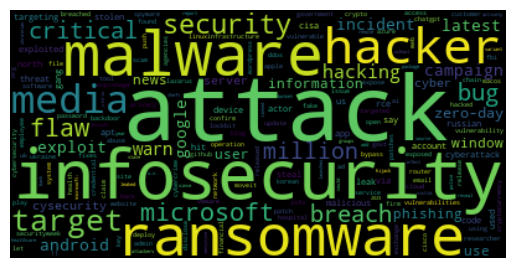

In [11]:
# Show the word cloud forming by keywords
from wordcloud import WordCloud
# 创建WordCloud对象
wordcloud = WordCloud()
sorted_data = dict(sorted_data)
# 生成词云图
wordcloud.generate_from_frequencies(sorted_data)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
sorted_data

{'attack': 335,
 'infosecurity': 289,
 'malware': 252,
 'ransomware': 223,
 'hacker': 204,
 'media': 162,
 'target': 154,
 'security': 143,
 'flaw': 113,
 'microsoft': 111,
 'breach': 101,
 'bug': 100,
 'critical': 97,
 'million': 96,
 'hacking': 90,
 'warn': 82,
 'campaign': 80,
 'latest': 78,
 'exploit': 76,
 'google': 76,
 'android': 75,
 'incident': 74,
 'zero-day': 73,
 'information': 73,
 'use': 71,
 'user': 69,
 'news': 67,
 'phishing': 65,
 'window': 64,
 'cysecurity': 64,
 'server': 63,
 'cyber': 60,
 'cyberattack': 60,
 'exploited': 58,
 'device': 58,
 'us': 56,
 'steal': 55,
 'russian': 52,
 'app': 51,
 'leak': 50,
 'threat': 50,
 'stolen': 49,
 'targeting': 49,
 'via': 48,
 'hit': 48,
 'north': 48,
 'account': 47,
 'say': 45,
 'malicious': 44,
 'gang': 43,
 'cisa': 43,
 'code': 42,
 'apt': 42,
 'used': 42,
 'actor': 41,
 'rce': 40,
 'vulnerability': 40,
 'backdoor': 40,
 'crypto': 39,
 'tool': 39,
 'linux': 38,
 'network': 37,
 'hacked': 37,
 'system': 37,
 'vulnerabilities

In [15]:
with open('output/output_nltk.json',encoding="utf-8") as file:
    # 读取文件内容
    data = json.load(file)
dict(data)

{'security': 1680,
 'attack': 1605,
 'threat': 1412,
 'actor': 1174,
 'data': 1146,
 'system': 1065,
 'file': 965,
 'access': 934,
 'information': 928,
 'attacker': 902,
 'service': 882,
 'target': 872,
 'researcher': 833,
 'group': 801,
 'malicious': 796,
 'company': 794,
 'cybersecurity': 782,
 'malware': 741,
 'including': 705,
 'server': 699,
 'victim': 669,
 'device': 665,
 'organization': 661,
 'network': 656,
 'report': 647,
 'users': 647,
 'email': 642,
 'code': 638,
 'account': 632,
 'tool': 604,
 'version': 579,
 'allow': 575,
 'hacker': 571,
 'news': 565,
 'campaign': 555,
 'since': 530,
 'customer': 527,
 'software': 520,
 'ransomware': 515,
 'operation': 514,
 'targeted': 509,
 'compromised': 507,
 '©': 493,
 'following': 489,
 'web': 478,
 'targeting': 464,
 'remote': 462,
 'provide': 461,
 'cyber': 458,
 'vulnerability': 449,
 'command': 449,
 'control': 449,
 'update': 448,
 'exploit': 443,
 'time': 443,
 'limited': 439,
 'latest': 435,
 'office': 433,
 'team': 430,
 'u